In [1]:
import copy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
# Importing the dataset

dataset = pd.read_csv('xclara.csv') # Dataset download from an example

print("Input Data and Shape")
print()
print(dataset.shape)
dataset.head()

Input Data and Shape

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


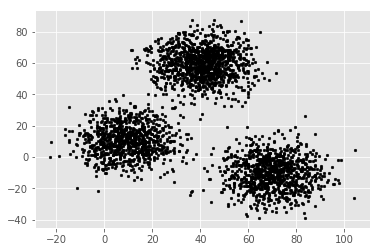

In [3]:
# Getting the values and plotting it

f1 = dataset['V1'].values
f2 = dataset['V2'].values

X = np.array(list(zip(f1, f2)))

plt.scatter(f1, f2, c='Black', s=7)

In [4]:
# Euclidean Distance Caculator

def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [5]:
# Number of clusters *Always need to be k>3 because if k is more than 3 the while loop,to ensure that the centroides are different, won't work
k = 3

diferent = False

while diferent == False:

    # X coordinates of random centroids
    C_x = np.random.randint(np.min(f1), np.max(f1), size=k)

    # Y coordinates of random centroids
    C_y = np.random.randint(np.min(f2), np.max(f2), size=k)

    C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
                      
    if C_x[0] == C_x[1] or C_x[0] == C_x[2] or C_x[1] == C_x[2] :
        diferent = False
    else: 
        diferent = True
    
    print(diferent)
    print(C_x[0],C_x[1],C_x[2])

print("Initial Centroids")
print(C)

True
71 89 4
Initial Centroids
[[71. 23.]
 [89. 49.]
 [ 4. 64.]]


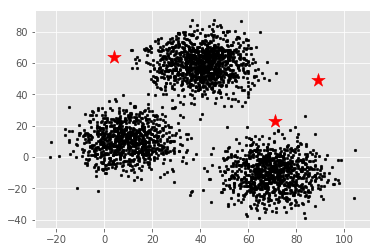

In [6]:
# Plotting along with the Centroids

plt.scatter(f1, f2, c='Black', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='r')

In [7]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)

# Cluster Lables
clusters = np.zeros(len(X))

# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)

# Loop will run till the error becomes zero

while error != 0: 
    
      # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        clusters[i] = np.argmin(distances)    
            
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
                
    error = dist(C, C_old, None)
    # Storing the old centroid values
    C_old = copy.copy(C)
       

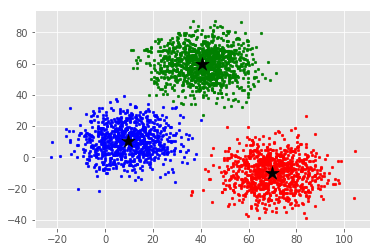

In [8]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()

for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='Black')

In [9]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)

# Fitting the input data
kmeans = kmeans.fit(X)

# Getting the cluster labels
labels = kmeans.predict(X)

# Centroid values
centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids
print("Centroid values")
print()
print("Iteration:")
print()
print(C) # From iteration
print()
print("Sklearn:")
print()
print(centroids) # From scikit learn

Centroid values

Iteration:

[[ 69.92419  -10.119641]
 [ 40.683628  59.715893]
 [  9.478045  10.686052]]

Sklearn:

[[ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]]


In [10]:
# Importing the Dataset

iris_data = open('iris.data')

# Assign colum names to the dataset

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe

iris_data = pd.read_csv(iris_data, names=names)

# Show the dataset "Iris"

iris_data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


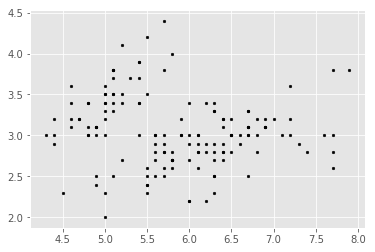

In [11]:
# Getting the values and plotting it

f1 = iris_data['sepal-length'].values
f2 = iris_data['sepal-width'].values

X = np.array(list(zip(f1, f2)))

plt.scatter(f1, f2, c='Black', s=7)

In [12]:
# Number of clusters *Always need to be k>3 because if k is more than 3 the while loop,to ensure that the centroides are different, won't work
k = 3

diferent = False

while diferent == False:

    # X coordinates of random centroids
    C_x = np.random.uniform(np.min(f1), np.max(f1), size=k)

    # Y coordinates of random centroids
    C_y = np.random.uniform(np.min(f2), np.max(f2), size=k)

    C = np.array(list(zip(C_x, C_y)))
               
    if C_x[0] == C_x[1] or C_x[0] == C_x[2] or C_x[1] == C_x[2] :
        diferent = False
    else: 
        diferent = True
    
    print(diferent)
    print(C_x[0],C_x[1],C_x[2])

print("Initial Centroids")
print(C)

True
5.450514257975533 5.78918355691942 6.598020022945494
Initial Centroids
[[5.45051426 2.13246925]
 [5.78918356 3.72846287]
 [6.59802002 3.48468406]]


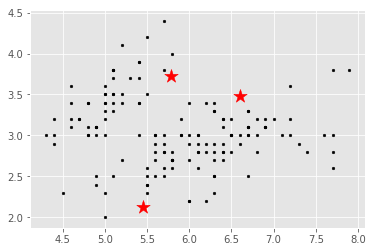

In [13]:
# Plotting along with the Centroids

plt.scatter(f1, f2, c='Black', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='r')

In [14]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)

# Cluster Lables
clusters = np.zeros(len(X))

# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)

# Loop will run till the error becomes zero

while error != 0: 
    
  
    # Assigning each value to its closest cluster (Euclidean distance)
    for i in range(len(X)):
        distances = dist(X[i], C)
        clusters[i] = np.argmin(distances)    
            
    # Finding the new centroids by taking the average value (np.mean)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
                
    error = dist(C, C_old, None)
    # Storing the old centroid values
    C_old = copy.copy(C)
       

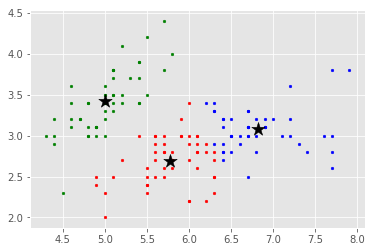

In [15]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()

for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='Black')

In [16]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)

# Fitting the input data
kmeans = kmeans.fit(X)

# Getting the cluster labels
labels = kmeans.predict(X)

# Centroid values
centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids
print("Centroid values")
print()
print("Iteration:")
print()
print(C) # From iteration
print()
print("Sklearn:")
print()
print(centroids) # From scikit learn

Centroid values

Iteration:

[[5.77358491 2.69245283]
 [5.006      3.418     ]
 [6.81276596 3.07446809]]

Sklearn:

[[5.006      3.418     ]
 [6.81276596 3.07446809]
 [5.77358491 2.69245283]]


In [17]:
# Getting the values and plotting it

f1 = iris_data['sepal-length'].values
f2 = iris_data['sepal-width'].values
f3 = iris_data['petal-length'].values
f4 = iris_data['petal-width'].values

X = np.array(list(zip(f1, f2, f3, f4)))

In [18]:
# Number of clusters *Always need to be k>3 because if k is more than 3 the while loop,to ensure that the centroides are different, won't work 
k = 3

diferent = False

while diferent == False:

    # X coordinates of random centroids
    C_x = np.random.uniform(np.min(f1), np.max(f1), size=k)

    # Y coordinates of random centroids
    C_y = np.random.uniform(np.min(f2), np.max(f2), size=k)
    
    # Z coordinates of random centroids
    C_z = np.random.uniform(np.min(f3), np.max(f3), size=k)

    # W coordinates of random centroids
    C_w = np.random.uniform(np.min(f4), np.max(f4), size=k)

    C = np.array(list(zip(C_x, C_y, C_z, C_w)))
               
    if C_x[0] == C_x[1] or C_x[0] == C_x[2] or C_x[1] == C_x[2] :
        diferent = False
    else: 
        diferent = True
    
    print(diferent)
    print(C_x[0],C_x[1],C_x[2])

print("Initial Centroids")
print()
print(C)


True
7.442550387385413 7.787345659274044 5.713218932542369
Initial Centroids

[[7.44255039 3.30156106 5.85127703 0.7036981 ]
 [7.78734566 3.75420004 1.51786401 0.74489379]
 [5.71321893 2.20566459 6.342948   1.06525304]]


In [19]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)

# Cluster Lables
clusters = np.zeros(len(X))

# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)

# Loop will run till the error becomes zero

while error != 0: 
    
  
    # Assigning each value to its closest cluster (Euclidean distance)
    for i in range(len(X)):
        distances = dist(X[i], C)
        clusters[i] = np.argmin(distances)    
            
    # Finding the new centroids by taking the average value (np.mean)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
                
    error = dist(C, C_old, None)
    # Storing the old centroid values
    C_old = copy.copy(C)

In [20]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)

# Fitting the input data
kmeans = kmeans.fit(X)

# Getting the cluster labels
labels = kmeans.predict(X)

# Centroid values
centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids
print("Centroid values")
print()
print("Iteration:")
print()
print(C) # From iteration
print()
print("Sklearn:")
print()
print(centroids) # From scikit learn

Centroid values

Iteration:

[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.418      1.464      0.244     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]

Sklearn:

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
